# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [3]:
import os
import keras
import tensorflow as tf
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpu_devices[0], True)

In [4]:
train, test = keras.datasets.cifar10.load_data()

In [5]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [6]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [7]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [8]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4]
EPOCHS = 50
BATCH_SIZE = 256
opt_SGD = keras.optimizers.SGD()
opt_RMSprop = keras.optimizers.RMSprop()
opt_Adagrad = keras.optimizers.Adagrad()
opt_Adam  = keras.optimizers.Adam()
optimizers = {"SGD" : opt_SGD, "RMSprop" : opt_RMSprop, "Adagrad" : opt_Adagrad, "Adam" : opt_Adam }

In [9]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    for opt_name in optimizers.keys():
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with LR = %.5f opt = %s" % (lr, opt_name))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        opt = optimizers[opt_name]
        opt.learning_rate = lr
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]

        exp_name_tag = "exp-lr-%s-%s" % (str(lr), opt_name) 
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}


Experiment with LR = 0.10000 opt = SGD
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==

Epoch 49/50
50000/50000 [==============================] - 3s 54us/step - loss: 0.7734 - accuracy: 0.7232 - val_loss: 1.6981 - val_accuracy: 0.4891
Epoch 50/50
50000/50000 [==============================] - 3s 54us/step - loss: 0.7567 - accuracy: 0.7320 - val_loss: 1.6646 - val_accuracy: 0.4981
Experiment with LR = 0.10000 opt = RMSprop
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
__________________________________________________

Epoch 47/50
50000/50000 [==============================] - 7s 140us/step - loss: 2.3083 - accuracy: 0.1009 - val_loss: 2.3093 - val_accuracy: 0.1000
Epoch 48/50
50000/50000 [==============================] - 4s 82us/step - loss: 2.3081 - accuracy: 0.0989 - val_loss: 2.3134 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 4s 72us/step - loss: 2.3079 - accuracy: 0.1000 - val_loss: 2.3088 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 3s 67us/step - loss: 2.3079 - accuracy: 0.0969 - val_loss: 2.3155 - val_accuracy: 0.1000
Experiment with LR = 0.10000 opt = Adagrad
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________

Epoch 45/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.4236 - accuracy: 0.4887 - val_loss: 1.5766 - val_accuracy: 0.4472
Epoch 46/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.4073 - accuracy: 0.4947 - val_loss: 1.6106 - val_accuracy: 0.4318
Epoch 47/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.4050 - accuracy: 0.4946 - val_loss: 1.6499 - val_accuracy: 0.4235
Epoch 48/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.4089 - accuracy: 0.4932 - val_loss: 1.6809 - val_accuracy: 0.4107
Epoch 49/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.3979 - accuracy: 0.4957 - val_loss: 1.5886 - val_accuracy: 0.4451
Epoch 50/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.3902 - accuracy: 0.5000 - val_loss: 1.6345 - val_accuracy: 0.4349
Experiment with LR = 0.10000 opt = Adam
Model: "model_1"
_______________________________________________________

Epoch 43/50
50000/50000 [==============================] - 4s 88us/step - loss: 2.3062 - accuracy: 0.0995 - val_loss: 2.3066 - val_accuracy: 0.1000
Epoch 44/50
50000/50000 [==============================] - 4s 72us/step - loss: 2.3071 - accuracy: 0.1007 - val_loss: 2.3068 - val_accuracy: 0.1000
Epoch 45/50
50000/50000 [==============================] - 4s 75us/step - loss: 2.3069 - accuracy: 0.0971 - val_loss: 2.3075 - val_accuracy: 0.1000
Epoch 46/50
50000/50000 [==============================] - 4s 75us/step - loss: 2.3065 - accuracy: 0.0996 - val_loss: 2.3075 - val_accuracy: 0.1000
Epoch 47/50
50000/50000 [==============================] - 3s 70us/step - loss: 2.3070 - accuracy: 0.0986 - val_loss: 2.3059 - val_accuracy: 0.1000
Epoch 48/50
50000/50000 [==============================] - 4s 70us/step - loss: 2.3063 - accuracy: 0.1003 - val_loss: 2.3056 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 3s 70us/step - loss: 2.3072 - accuracy: 0.0991 - val_

Epoch 41/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.2972 - accuracy: 0.5451 - val_loss: 1.4473 - val_accuracy: 0.4876
Epoch 42/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.2914 - accuracy: 0.5457 - val_loss: 1.4527 - val_accuracy: 0.4801
Epoch 43/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.2824 - accuracy: 0.5488 - val_loss: 1.5373 - val_accuracy: 0.4695
Epoch 44/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.2785 - accuracy: 0.5518 - val_loss: 1.4075 - val_accuracy: 0.5027
Epoch 45/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.2717 - accuracy: 0.5545 - val_loss: 1.4746 - val_accuracy: 0.4758
Epoch 46/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.2700 - accuracy: 0.5544 - val_loss: 1.3902 - val_accuracy: 0.5046
Epoch 47/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.2610 - accuracy: 0.5580 - val_

Epoch 39/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.7359 - accuracy: 0.3759 - val_loss: 1.7290 - val_accuracy: 0.3790
Epoch 40/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.7297 - accuracy: 0.3790 - val_loss: 1.8219 - val_accuracy: 0.3429
Epoch 41/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.7269 - accuracy: 0.3796 - val_loss: 1.8188 - val_accuracy: 0.3518
Epoch 42/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.7267 - accuracy: 0.3818 - val_loss: 1.6884 - val_accuracy: 0.3825
Epoch 43/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.7182 - accuracy: 0.3831 - val_loss: 1.7970 - val_accuracy: 0.3613
Epoch 44/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.7124 - accuracy: 0.3841 - val_loss: 1.9781 - val_accuracy: 0.3256
Epoch 45/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.7157 - accuracy: 0.3845 - val_

Epoch 37/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.1656 - accuracy: 0.5896 - val_loss: 1.3783 - val_accuracy: 0.5157
Epoch 38/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.1534 - accuracy: 0.5931 - val_loss: 1.3922 - val_accuracy: 0.5131
Epoch 39/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.1468 - accuracy: 0.5950 - val_loss: 1.3745 - val_accuracy: 0.5180
Epoch 40/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.1405 - accuracy: 0.5989 - val_loss: 1.3470 - val_accuracy: 0.5246
Epoch 41/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.1339 - accuracy: 0.6014 - val_loss: 1.3542 - val_accuracy: 0.5239
Epoch 42/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.1239 - accuracy: 0.6063 - val_loss: 1.3783 - val_accuracy: 0.5161
Epoch 43/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.1185 - accuracy: 0.6068 - val_

Epoch 35/50
50000/50000 [==============================] - 4s 73us/step - loss: 2.3032 - accuracy: 0.0972 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 36/50
50000/50000 [==============================] - 4s 73us/step - loss: 2.3031 - accuracy: 0.0994 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 37/50
50000/50000 [==============================] - 4s 74us/step - loss: 2.3031 - accuracy: 0.1001 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 38/50
50000/50000 [==============================] - 4s 75us/step - loss: 2.3030 - accuracy: 0.1009 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 39/50
50000/50000 [==============================] - 4s 75us/step - loss: 2.3030 - accuracy: 0.0998 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 40/50
50000/50000 [==============================] - 4s 76us/step - loss: 2.3032 - accuracy: 0.0973 - val_loss: 2.3028 - val_accuracy: 0.0999
Epoch 41/50
50000/50000 [==============================] - 4s 77us/step - loss: 2.3031 - accuracy: 0.0990 - val_

Epoch 33/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.7484 - accuracy: 0.3908 - val_loss: 1.7505 - val_accuracy: 0.3879
Epoch 34/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.7438 - accuracy: 0.3926 - val_loss: 1.7449 - val_accuracy: 0.3905
Epoch 35/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.7391 - accuracy: 0.3942 - val_loss: 1.7409 - val_accuracy: 0.3948
Epoch 36/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.7345 - accuracy: 0.3954 - val_loss: 1.7363 - val_accuracy: 0.3942
Epoch 37/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.7297 - accuracy: 0.3983 - val_loss: 1.7305 - val_accuracy: 0.3966
Epoch 38/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.7254 - accuracy: 0.4000 - val_loss: 1.7270 - val_accuracy: 0.3969
Epoch 39/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.7210 - accuracy: 0.4010 - val_

Epoch 31/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.0554 - accuracy: 0.6190 - val_loss: 1.6565 - val_accuracy: 0.4762
Epoch 32/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.0462 - accuracy: 0.6251 - val_loss: 1.6099 - val_accuracy: 0.4848
Epoch 33/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.0297 - accuracy: 0.6292 - val_loss: 1.6809 - val_accuracy: 0.4520
Epoch 34/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.0135 - accuracy: 0.6358 - val_loss: 1.6465 - val_accuracy: 0.4791
Epoch 35/50
50000/50000 [==============================] - 3s 63us/step - loss: 0.9967 - accuracy: 0.6436 - val_loss: 1.6646 - val_accuracy: 0.4832
Epoch 36/50
50000/50000 [==============================] - 3s 64us/step - loss: 0.9838 - accuracy: 0.6474 - val_loss: 1.9092 - val_accuracy: 0.4278
Epoch 37/50
50000/50000 [==============================] - 3s 63us/step - loss: 0.9671 - accuracy: 0.6511 - val_

Epoch 29/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.3621 - accuracy: 0.5253 - val_loss: 1.4307 - val_accuracy: 0.4964
Epoch 30/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.3558 - accuracy: 0.5276 - val_loss: 1.4259 - val_accuracy: 0.4937
Epoch 31/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.3493 - accuracy: 0.5304 - val_loss: 1.4194 - val_accuracy: 0.4956
Epoch 32/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.3435 - accuracy: 0.5325 - val_loss: 1.4211 - val_accuracy: 0.4958
Epoch 33/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.3375 - accuracy: 0.5344 - val_loss: 1.4461 - val_accuracy: 0.4905
Epoch 34/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.3326 - accuracy: 0.5341 - val_loss: 1.4072 - val_accuracy: 0.5026
Epoch 35/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.3262 - accuracy: 0.5381 

Epoch 27/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.2524 - accuracy: 0.5535 - val_loss: 1.4363 - val_accuracy: 0.5034
Epoch 28/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.2447 - accuracy: 0.5571 - val_loss: 1.3904 - val_accuracy: 0.5104
Epoch 29/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.2352 - accuracy: 0.5612 - val_loss: 1.4135 - val_accuracy: 0.5061
Epoch 30/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.2356 - accuracy: 0.5592 - val_loss: 1.4004 - val_accuracy: 0.5051
Epoch 31/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.2191 - accuracy: 0.5644 - val_loss: 1.4386 - val_accuracy: 0.4947
Epoch 32/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.2107 - accuracy: 0.5681 - val_loss: 1.4186 - val_accuracy: 0.5030
Epoch 33/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.2014 - accuracy: 0.5707 - val_

Epoch 25/50
50000/50000 [==============================] - 5s 108us/step - loss: 2.1364 - accuracy: 0.2454 - val_loss: 2.1297 - val_accuracy: 0.2518
Epoch 26/50
50000/50000 [==============================] - 5s 105us/step - loss: 2.1316 - accuracy: 0.2473 - val_loss: 2.1250 - val_accuracy: 0.2549
Epoch 27/50
50000/50000 [==============================] - 7s 145us/step - loss: 2.1268 - accuracy: 0.2505 - val_loss: 2.1203 - val_accuracy: 0.2554
Epoch 28/50
50000/50000 [==============================] - 5s 97us/step - loss: 2.1222 - accuracy: 0.2529 - val_loss: 2.1158 - val_accuracy: 0.2566
Epoch 29/50
50000/50000 [==============================] - 5s 95us/step - loss: 2.1177 - accuracy: 0.2554 - val_loss: 2.1113 - val_accuracy: 0.2575
Epoch 30/50
50000/50000 [==============================] - 5s 94us/step - loss: 2.1133 - accuracy: 0.2572 - val_loss: 2.1069 - val_accuracy: 0.2614
Epoch 31/50
50000/50000 [==============================] - 4s 78us/step - loss: 2.1090 - accuracy: 0.2589 - v

Epoch 23/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.2437 - accuracy: 0.5657 - val_loss: 1.4114 - val_accuracy: 0.4989
Epoch 24/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.2291 - accuracy: 0.5685 - val_loss: 1.4342 - val_accuracy: 0.4865
Epoch 25/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.2185 - accuracy: 0.5727 - val_loss: 1.4182 - val_accuracy: 0.4944
Epoch 26/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.2025 - accuracy: 0.5810 - val_loss: 1.4310 - val_accuracy: 0.4946
Epoch 27/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.1910 - accuracy: 0.5820 - val_loss: 1.3791 - val_accuracy: 0.5179
Epoch 28/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.1779 - accuracy: 0.5880 - val_loss: 1.4282 - val_accuracy: 0.5017
Epoch 29/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.1680 - accuracy: 0.5930 - val_

Epoch 21/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.7084 - accuracy: 0.4096 - val_loss: 1.7122 - val_accuracy: 0.4029
Epoch 22/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.7046 - accuracy: 0.4111 - val_loss: 1.7090 - val_accuracy: 0.4056
Epoch 23/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.7014 - accuracy: 0.4125 - val_loss: 1.7047 - val_accuracy: 0.4058
Epoch 24/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.6977 - accuracy: 0.4136 - val_loss: 1.7018 - val_accuracy: 0.4066
Epoch 25/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.6944 - accuracy: 0.4140 - val_loss: 1.6985 - val_accuracy: 0.4094
Epoch 26/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.6912 - accuracy: 0.4150 - val_loss: 1.6958 - val_accuracy: 0.4098
Epoch 27/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.6880 - accuracy: 0.4164 - val

50000/50000 [==============================] - 4s 71us/step - loss: 1.3018 - accuracy: 0.5414 - val_loss: 1.3837 - val_accuracy: 0.5069
Epoch 19/50
50000/50000 [==============================] - 4s 70us/step - loss: 1.2882 - accuracy: 0.5496 - val_loss: 1.3937 - val_accuracy: 0.5055
Epoch 20/50
50000/50000 [==============================] - 4s 70us/step - loss: 1.2815 - accuracy: 0.5508 - val_loss: 1.3661 - val_accuracy: 0.5168
Epoch 21/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.2663 - accuracy: 0.5546 - val_loss: 1.3651 - val_accuracy: 0.5148
Epoch 22/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.2533 - accuracy: 0.5583 - val_loss: 1.3755 - val_accuracy: 0.5114
Epoch 23/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.2393 - accuracy: 0.5643 - val_loss: 1.3691 - val_accuracy: 0.5138
Epoch 24/50
50000/50000 [==============================] - 4s 70us/step - loss: 1.2338 - accuracy: 0.5671 - val_loss: 1.3845

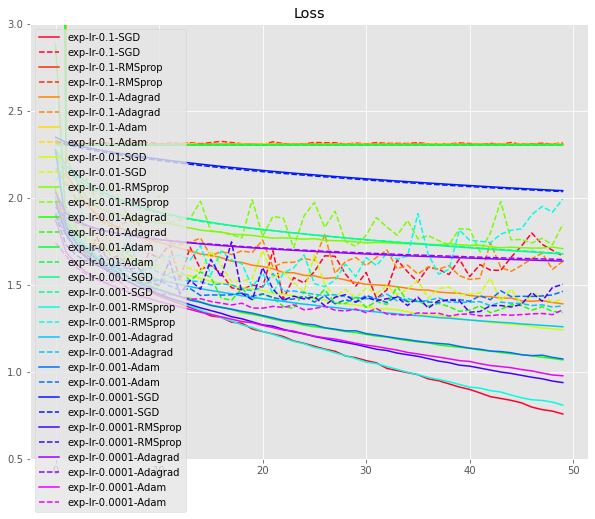

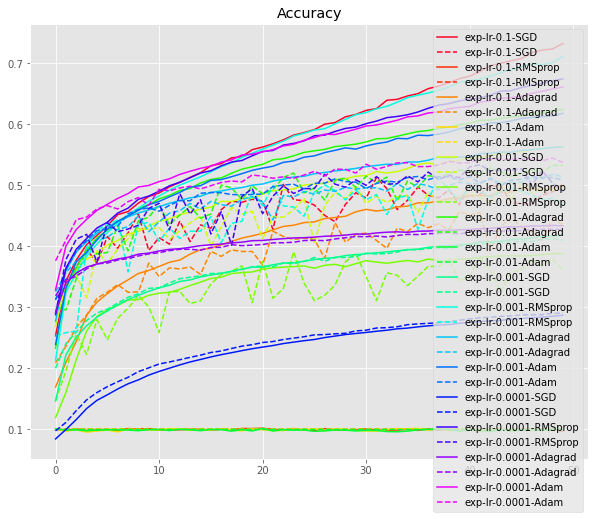

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
"""Code Here
將結果繪出
"""
    
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(10,8))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.ylim((0.5,3))
plt.show()

plt.figure(figsize=(10,8))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()